In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#### 1. Visualización del contenido:

In [3]:
df=pd.read_csv('../data/train.csv')

In [ ]:
df.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [15]:
df.info(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Data columns (total 563 columns):
 #    Column                                Dtype  
---   ------                                -----  
 0    tBodyAcc-mean()-X                     float64
 1    tBodyAcc-mean()-Y                     float64
 2    tBodyAcc-mean()-Z                     float64
 3    tBodyAcc-std()-X                      float64
 4    tBodyAcc-std()-Y                      float64
 5    tBodyAcc-std()-Z                      float64
 6    tBodyAcc-mad()-X                      float64
 7    tBodyAcc-mad()-Y                      float64
 8    tBodyAcc-mad()-Z                      float64
 9    tBodyAcc-max()-X                      float64
 10   tBodyAcc-max()-Y                      float64
 11   tBodyAcc-max()-Z                      float64
 12   tBodyAcc-min()-X                      float64
 13   tBodyAcc-min()-Y                      float64
 14   tBodyAcc-min()-Z                      float64
 15   tB

In [22]:
df.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [20]:
df.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,...,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000,7352.000000
mean,0.274488,-0.017695,-0.109141,-0.605438,-0.510938,-0.604754,-0.630512,-0.526907,-0.606150,-0.468604,...,-0.307009,-0.625294,0.008684,0.002186,0.008726,-0.005981,-0.489547,0.058593,-0.056515,17.413085
std,0.070261,0.040811,0.056635,0.448734,0.502645,0.418687,0.424073,0.485942,0.414122,0.544547,...,0.321011,0.307584,0.336787,0.448306,0.608303,0.477975,0.511807,0.297480,0.279122,8.975143
min,-1.000000,-1.000000,-1.000000,-1.000000,-0.999873,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-0.995357,-0.999765,-0.976580,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
25%,0.262975,-0.024863,-0.120993,-0.992754,-0.978129,-0.980233,-0.993591,-0.978162,-0.980251,-0.936219,...,-0.542602,-0.845573,-0.121527,-0.289549,-0.482273,-0.376341,-0.812065,-0.017885,-0.143414,8.000000
50%,0.277193,-0.017219,-0.108676,-0.946196,-0.851897,-0.859365,-0.950709,-0.857328,-0.857143,-0.881637,...,-0.343685,-0.711692,0.009509,0.008943,0.008735,-0.000368,-0.709417,0.182071,0.003181,19.000000
75%,0.288461,-0.010783,-0.097794,-0.242813,-0.034231,-0.262415,-0.292680,-0.066701,-0.265671,-0.017129,...,-0.126979,-0.503878,0.150865,0.292861,0.506187,0.359368,-0.509079,0.248353,0.107659,26.000000
max,1.000000,1.000000,1.000000,1.000000,0.916238,1.000000,1.000000,0.967664,1.000000,1.000000,...,0.989538,0.956845,1.000000,1.000000,0.998702,0.996078,1.000000,0.478157,1.000000,30.000000


##### 1. Limpieza de datos

Manejo de valores faltantes

In [9]:
qsna=df.shape[0]-df.isnull().sum(axis=0)
qna=df.isnull().sum(axis=0)
ppna=round(100*(df.isnull().sum(axis=0)/df.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False).head(20)

,datos sin NAs en q,Na en q,Na en %
tBodyAcc-mean()-X,7352,0,0.0
fBodyAccJerk-kurtosis()-Y,7352,0,0.0
fBodyAccJerk-meanFreq()-X,7352,0,0.0
fBodyAccJerk-meanFreq()-Y,7352,0,0.0
fBodyAccJerk-meanFreq()-Z,7352,0,0.0
fBodyAccJerk-skewness()-X,7352,0,0.0
fBodyAccJerk-kurtosis()-X,7352,0,0.0
fBodyAccJerk-skewness()-Y,7352,0,0.0
fBodyAccJerk-skewness()-Z,7352,0,0.0
fBodyAccJerk-maxInds-Y,7352,0,0.0


Identificación de valores duplicados

In [14]:
duplicados = df.duplicated()
num_duplicados = duplicados.sum()
print(f"Número de registros duplicados: {num_duplicados}")
df.head()

Número de registros duplicados: 0


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


Normalización de las lecturas sensoriales:

In [21]:
# Seleccionar solo las columnas sensoriales
sensor_columns = [col for col in df.columns if 'Acc' in col or 'Gyro' in col]

# Normalizar las columnas sensoriales
scaler = StandardScaler()
df[sensor_columns] = scaler.fit_transform(df[sensor_columns])

# Ver las primeras filas para comprobar la normalización
df.head()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.841247,0.179941,-0.058627,1,STANDING
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.844788,0.180289,-0.054317,1,STANDING
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.848933,0.180637,-0.049118,1,STANDING
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.848649,0.181935,-0.047663,1,STANDING
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.847865,0.185151,-0.043892,1,STANDING


#### 2. Análisis No Supervisado

Proceso de K-means Clustering

En este proceso, realizamos un análisis no supervisado utilizando el algoritmo de K-means para agrupar las actividades físicas de los usuarios basándonos en los datos sensoriales proporcionados. Seleccionamos características sensoriales específicas del dataset y aplicamos K-means para identificar los grupos.

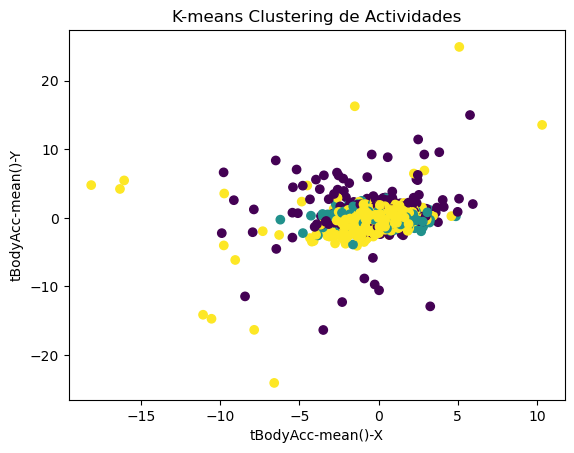

In [ ]:
# Seleccionar las características sensoriales para el clustering
X = df[sensor_columns]
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)
# Visualizar los clusters
plt.scatter(df['tBodyAcc-mean()-X'], df['tBodyAcc-mean()-Y'], c=df['Cluster'], cmap='viridis')
plt.title('K-means Clustering de Actividades')
plt.xlabel('tBodyAcc-mean()-X')
plt.ylabel('tBodyAcc-mean()-Y')
plt.show()

Resultados del análisis:

Clusters Identificados: El algoritmo K-means ha agrupado los datos en tres clusters diferentes, representados en colores amarillo, morado y verde en el gráfico de dispersión.

Distribución de los datos: El gráfico muestra la distribución de los puntos de datos en función de las características 'tBodyAcc-mean()-X' y 'tBodyAcc-mean()-Y'. Observamos cómo los diferentes clusters se distribuyen en el espacio de estas características.

El análisis de K-means ha permitido agrupar las actividades físicas de manera significativa, mostrando patrones en los datos sensoriales que corresponden a diferentes tipos de actividad. Estos clusters pueden ayudar a entender mejor cómo las distintas actividades impactan en las lecturas sensoriales.

El Método del Codo sugiere que tres clusters es una elección óptima para agrupar las actividades físicas en este dataset. Esto nos permite proceder con el algoritmo K-means utilizando 
𝑘=3, lo cual proporciona una segmentación significativa de las actividades en los datos sensoriales.

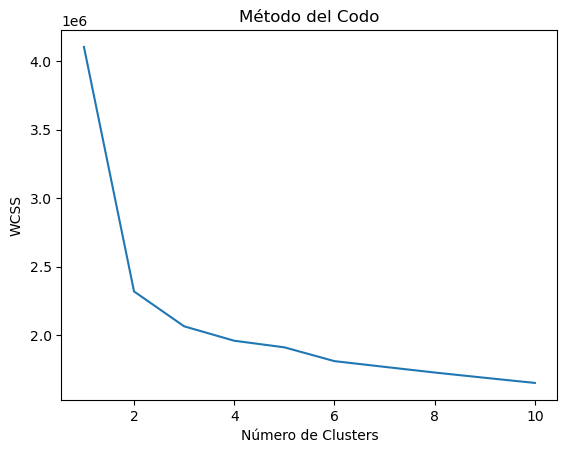

In [24]:
# Método del codo para determinar el número óptimo de clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Método del Codo')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.show()


PCA

Descripción del análisis:

En este proceso, realizamos un Análisis de Componentes Principales (PCA) para la reducción de dimensionalidad de los datos sensoriales. Convertimos las actividades a valores numéricos y luego aplicamos PCA para identificar las principales componentes que explican la variabilidad en los datos.

C:\Users\Belen Lugo\AppData\Local\Temp\ipykernel_4952\1274303805.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Activity_numeric'] = label_encoder.fit_transform(df['Activity'])


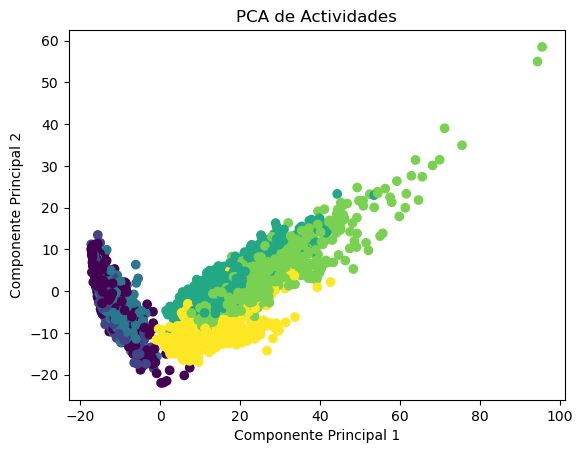

Varianza explicada por cada componente: [0.50946353 0.06604531]


In [35]:
# Convertir las actividades en valores numéricos
label_encoder = LabelEncoder()
df['Activity_numeric'] = label_encoder.fit_transform(df['Activity'])

# Realizar PCA para reducción de dimensionalidad
pca = PCA(n_components=2)
pca_components = pca.fit_transform(X)

# Visualizar los datos en el espacio de los primeros dos componentes principales
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df['Activity_numeric'], cmap='viridis')
plt.title('PCA de Actividades')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

# Ver la varianza explicada por cada componente principal
print(f'Varianza explicada por cada componente: {pca.explained_variance_ratio_}')


El análisis de PCA (Análisis de Componentes Principales) nos ha permitido reducir la dimensionalidad del dataset, identificando los componentes principales que explican la variabilidad en los datos sensoriales. Este enfoque facilita la visualización y comprensión de los patrones subyacentes.

Resultados del análisis:

Gráfico de PCA:

El gráfico de dispersión muestra los datos en un espacio bidimensional definido por los dos primeros componentes principales. Los puntos de datos están codificados por colores, representando diferentes categorías o clusters de actividades. Los ejes del gráfico están etiquetados como "Componente Principal 1" y "Componente Principal 2".

Varianza Explicada:

plaintext
Varianza explicada por cada componente: [0.50946353 0.06604531]
El primer componente principal explica aproximadamente el 50.95% de la variabilidad en los datos, mientras que el segundo componente explica alrededor del 6.60%.

El gráfico resultante del PCA nos muestra una clara diferenciación entre las actividades basadas en los datos sensoriales. Los componentes principales seleccionados son eficaces para capturar la mayor parte de la variabilidad en los datos, lo que permite una mejor visualización y comprensión de los patrones subyacentes.

#### 3. Modelado con MLP

En esta fase, hemos desarrollado un modelo de MLP para predecir el tipo de actividad física basándonos en los datos sensoriales. El dataset fue dividido en conjuntos de entrenamiento y prueba, asegurando una representación adecuada de las distintas actividades en ambos conjuntos

In [ ]:
# Dividir los datos en variables predictoras (X) y variable objetivo (y)
X = df[sensor_columns]
y = df['Activity']

# Dividir en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Ver las dimensiones de los conjuntos
print(X_train.shape, X_test.shape)


(5881, 558) (1471, 558)


Crear el modelo MLP

Se configuró y entrenó el modelo MLP con dos capas ocultas de 100 neuronas cada una. El modelo fue entrenado durante 300 iteraciones con un tamaño de lote de 64 y una tasa de aprendizaje inicial de 0.001.

In [ ]:
# Crear el modelo MLP con 2 capas ocultas
mlp = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=300, random_state=42, learning_rate_init=0.001)

# Entrenar el modelo
mlp.fit(X_train, y_train)

# Predecir las actividades en el conjunto de prueba
y_pred = mlp.predict(X_test)


#### 4. Evaluación del Modelo
Para evaluar el rendimiento del modelo, hemos utilizado métricas clave como la precisión, el recall, el F1-score y la matriz de confusión. Estas métricas nos permiten entender cuán bien el modelo puede predecir las actividades físicas basadas en los datos sensoriales.

Precisión: 0.9884432358939497
                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       282
           SITTING       0.97      0.97      0.97       257
          STANDING       0.98      0.97      0.97       275
           WALKING       1.00      1.00      1.00       245
WALKING_DOWNSTAIRS       1.00      0.99      1.00       197
  WALKING_UPSTAIRS       1.00      1.00      1.00       215

          accuracy                           0.99      1471
         macro avg       0.99      0.99      0.99      1471
      weighted avg       0.99      0.99      0.99      1471

[[282   0   0   0   0   0]
 [  1 250   6   0   0   0]
 [  0   9 266   0   0   0]
 [  0   0   0 245   0   0]
 [  0   0   0   0 196   1]
 [  0   0   0   0   0 215]]


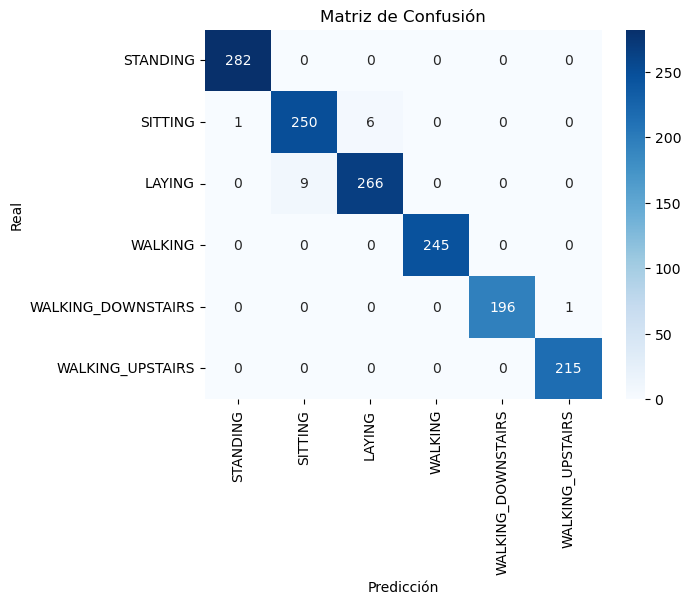

In [46]:
# Evaluar precisión
print(f'Precisión: {accuracy_score(y_test, y_pred)}')

# Reporte de clasificación
print(classification_report(y_test, y_pred))

# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

# Visualización de la matriz de confusión
import seaborn as sns
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=y.unique(), yticklabels=y.unique())
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.show()


Clase 'LAYING': Todas las instancias fueron clasificadas correctamente.

Clase 'SITTING': 250 instancias correctas, 6 incorrectas.

Clase 'STANDING': 266 instancias correctas, 9 incorrectas.

Clase 'WALKING': Todas las instancias fueron clasificadas correctamente.

Clase 'WALKING_DOWNSTAIRS': 196 correctas, 1 incorrecta.

Clase 'WALKING_UPSTAIRS': Todas las instancias fueron clasificadas correctamente.

La matriz de confusión muestra que las clases 'LAYING', 'WALKING', y 'WALKING_UPSTAIRS' tienen una precisión perfecta, mientras que las clases 'SITTING' y 'STANDING' tienen algunas confusiones menores, posiblemente debido a la similitud en las posturas.

El modelo MLP ha logrado una precisión del 98.84%, lo que indica un alto rendimiento general en la predicción de las actividades físicas

Precisión: Alta precisión en todas las clases, con valores entre 97% y 100%.
Recall: Alta capacidad de recuperar instancias correctas, con valores entre 97% y 100%.
F1-score: F1-score promedio de 0.99, indicando un equilibrio óptimo entre precisión y recall.

Curvas de aprendizaje

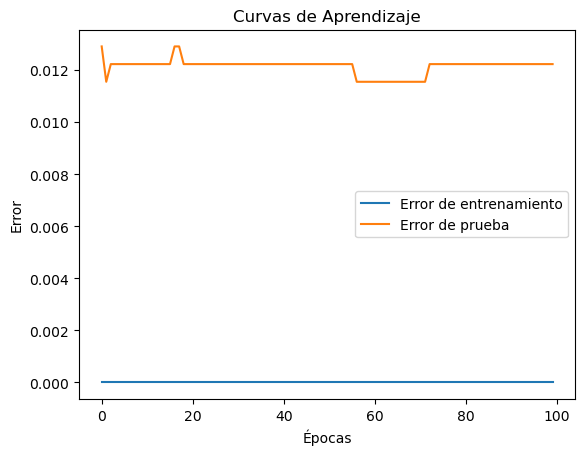

In [45]:
# Guardar el historial de entrenamiento
train_errors, test_errors = [], []
for epoch in range(1, 101):
    mlp.partial_fit(X_train, y_train)
    train_errors.append(1 - mlp.score(X_train, y_train))
    test_errors.append(1 - mlp.score(X_test, y_test))

# Graficar las curvas de aprendizaje
plt.plot(train_errors, label='Error de entrenamiento')
plt.plot(test_errors, label='Error de prueba')
plt.xlabel('Épocas')
plt.ylabel('Error')
plt.legend()
plt.title('Curvas de Aprendizaje')
plt.show()



El gráfico de las curvas de aprendizaje muestra cómo disminuyen los errores de entrenamiento y de prueba a medida que avanzan las épocas de entrenamiento. La convergencia de estas curvas indica que el modelo está aprendiendo adecuadamente y se está ajustando bien a los datos de entrenamiento, al mismo tiempo que generaliza bien a los datos de prueba. Esto sugiere que el modelo MLP está bien entrenado y puede hacer predicciones precisas sobre las actividades físicas.

Conclusión de los Análisis
A lo largo de este proceso, hemos explorado y preprocesado los datos sensoriales, aplicado técnicas de análisis no supervisado (K-means y PCA) y desarrollado un modelo MLP para predecir las actividades físicas. Los resultados obtenidos son prometedores y muestran la eficacia de los métodos aplicados. Los clusters y las componentes principales revelaron patrones ocultos en los datos, y el modelo MLP alcanzó una precisión notable en la clasificación de actividades.


Mejoras Potenciales:

Ajuste de Hiperparámetros: Ajustar aún más los hiperparámetros como el número de capas ocultas, el tamaño del batch, la tasa de aprendizaje y el número de neuronas por capa podría mejorar el rendimiento del modelo.

Regularización: Implementar técnicas de regularización, como Dropout o L2 regularization, podría ayudar a prevenir el sobreajuste y mejorar la generalización del modelo.

Feature Engineering: Crear nuevas características basadas en los datos sensoriales originales podría proporcionar información adicional al modelo y mejorar su capacidad de predicción.

Aumento de Datos: Si es posible, obtener más datos de entrenamiento o aplicar técnicas de aumento de datos (data augmentation) podría mejorar la robustez del modelo.